**1. Introduction**

For this project, I'll be working with "NutriStore," leading nutrition and supplement retail chain that offers a comprehensive range of products for wellness and fitness needs.

The purpose of this notebook will be to predict the number of sales for each store to provide the stores with essential insights into the upcoming inventory and cash flow for the following months.

The dataset that they provided contains the information of sales of the past 18 months along with:

ID: Unique identifier for a row

Store id: Unique id for each store

Store type: Type of the store

Location type: Type of the location where the store is located

Region Code: Code of the region where the store is located

Date: Information about the date

Holiday: If there is a holiday on the given date

Discount: If the store offers a discount on the given date

**2. Importing Necessary Libraries and Dataset**


In [1]:
!pip install proplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 33.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 11.3 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.4.3-cp310-cp310-linux_x86_64.whl size=10438831 sha256=81603e7eb25353b0fa953426509b5b13a4e7b926ad469d980094fd912f106ea7
  Stored in directory: /root/.cache/pip/wheels/71/af/e4/d399b616d3e7ae88374c2ebab2d5d3ecf776a3590d4f5f768f
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.20.0 requires matplotlib>=3.5, but you have matplotlib 3.4.3 which is incompatible.
bigframes 1.27.0 requires matplotlib>=3.7.1, but you hav

**Import Necessary Libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import proplot as pplt
from scipy import stats
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [70]:
train = pd.read_csv('/content/TRAIN.csv')
test = pd.read_csv('/content/TEST_FINAL.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


**3. Data Preprocessing**

**Rename Values**

In [71]:
# Rename the values on "Discount"
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})

**Data Types**

In [72]:
# Data types
print('Data tyoe of each variable is as follow : ')
print(train.dtypes)

Data tyoe of each variable is as follow : 
ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object


In [73]:
# Changing data types
train[['Store_id','Discount','Holiday']] = train[['Store_id','Discount','Holiday']].astype(object) #Changing them from int64 to object
train['Date'] = pd.to_datetime(train.Date) #Changing Date datatype from object to datetime64.
print(train.dtypes)

ID                       object
Store_id                 object
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                  object
Discount                 object
#Order                    int64
Sales                   float64
dtype: object


**Duplicate and Missing Values**

In [74]:
# Do we have duplicates?
print('Number of duplicates:', len(train[train.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


**4. Exploratory data analysis**

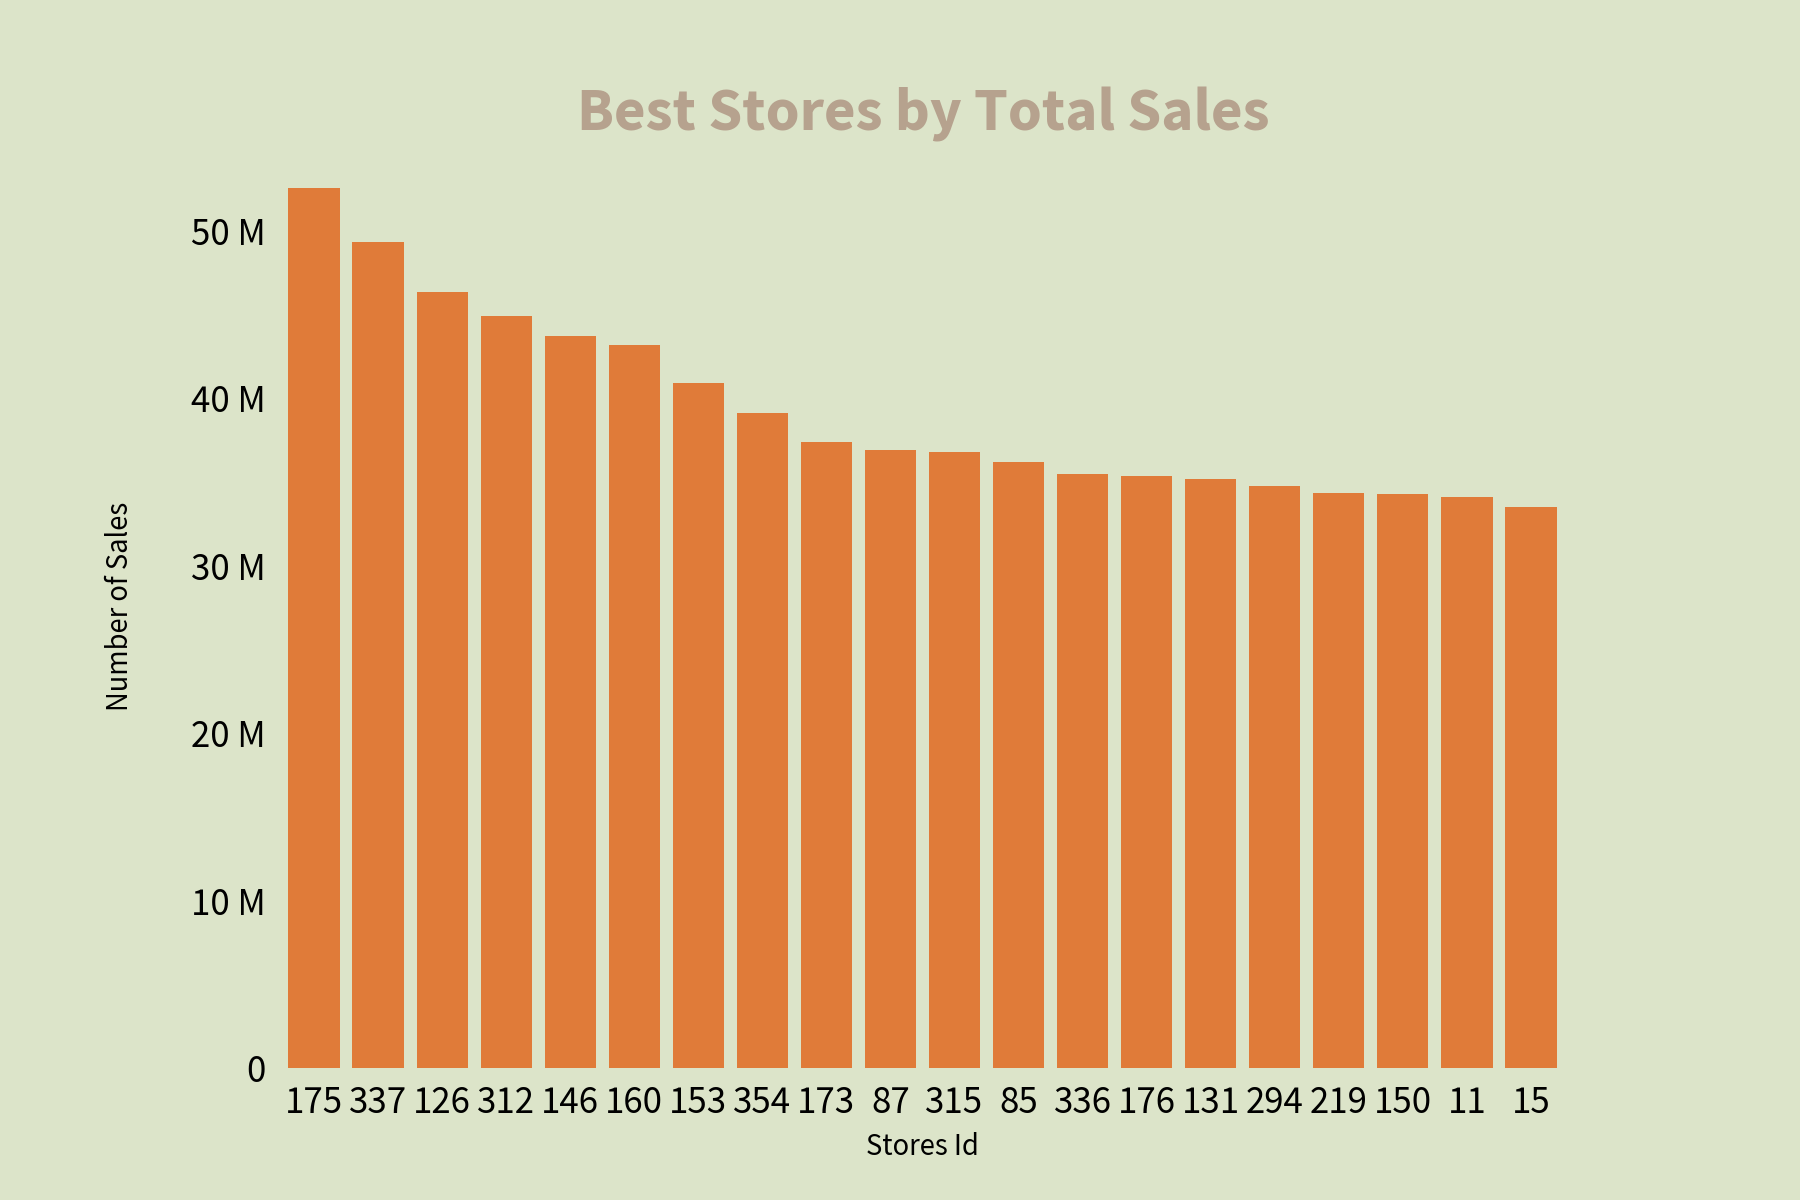

In [75]:
# Which are the best stores (by number of sells)?
best_stores = train.groupby(['Store_id'], as_index=False)['Sales'].sum()  # sum sales from same store
best_stores = best_stores.sort_values('Sales', ascending = False)  # sort data
best_stores = best_stores.head(20)   # select top 20
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#DCE4C9')
ax.patch.set_facecolor('#DCE4C9')

# For changing colors
col1 = best_stores.head(1)
col2 = best_stores.tail(19)

ax.bar(col1.Store_id, col1.Sales, color = '#E07B39')
ax.bar(col2.Store_id, col2.Sales, color = '#E07B39')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Stores Id', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(4.1, 56000000, "Best Stores by Total Sales", size=22, color="#B6A28E", fontweight="bold")
plt.show()

The above graph shows us that Store ID 175 is the best Store in terms of Sales

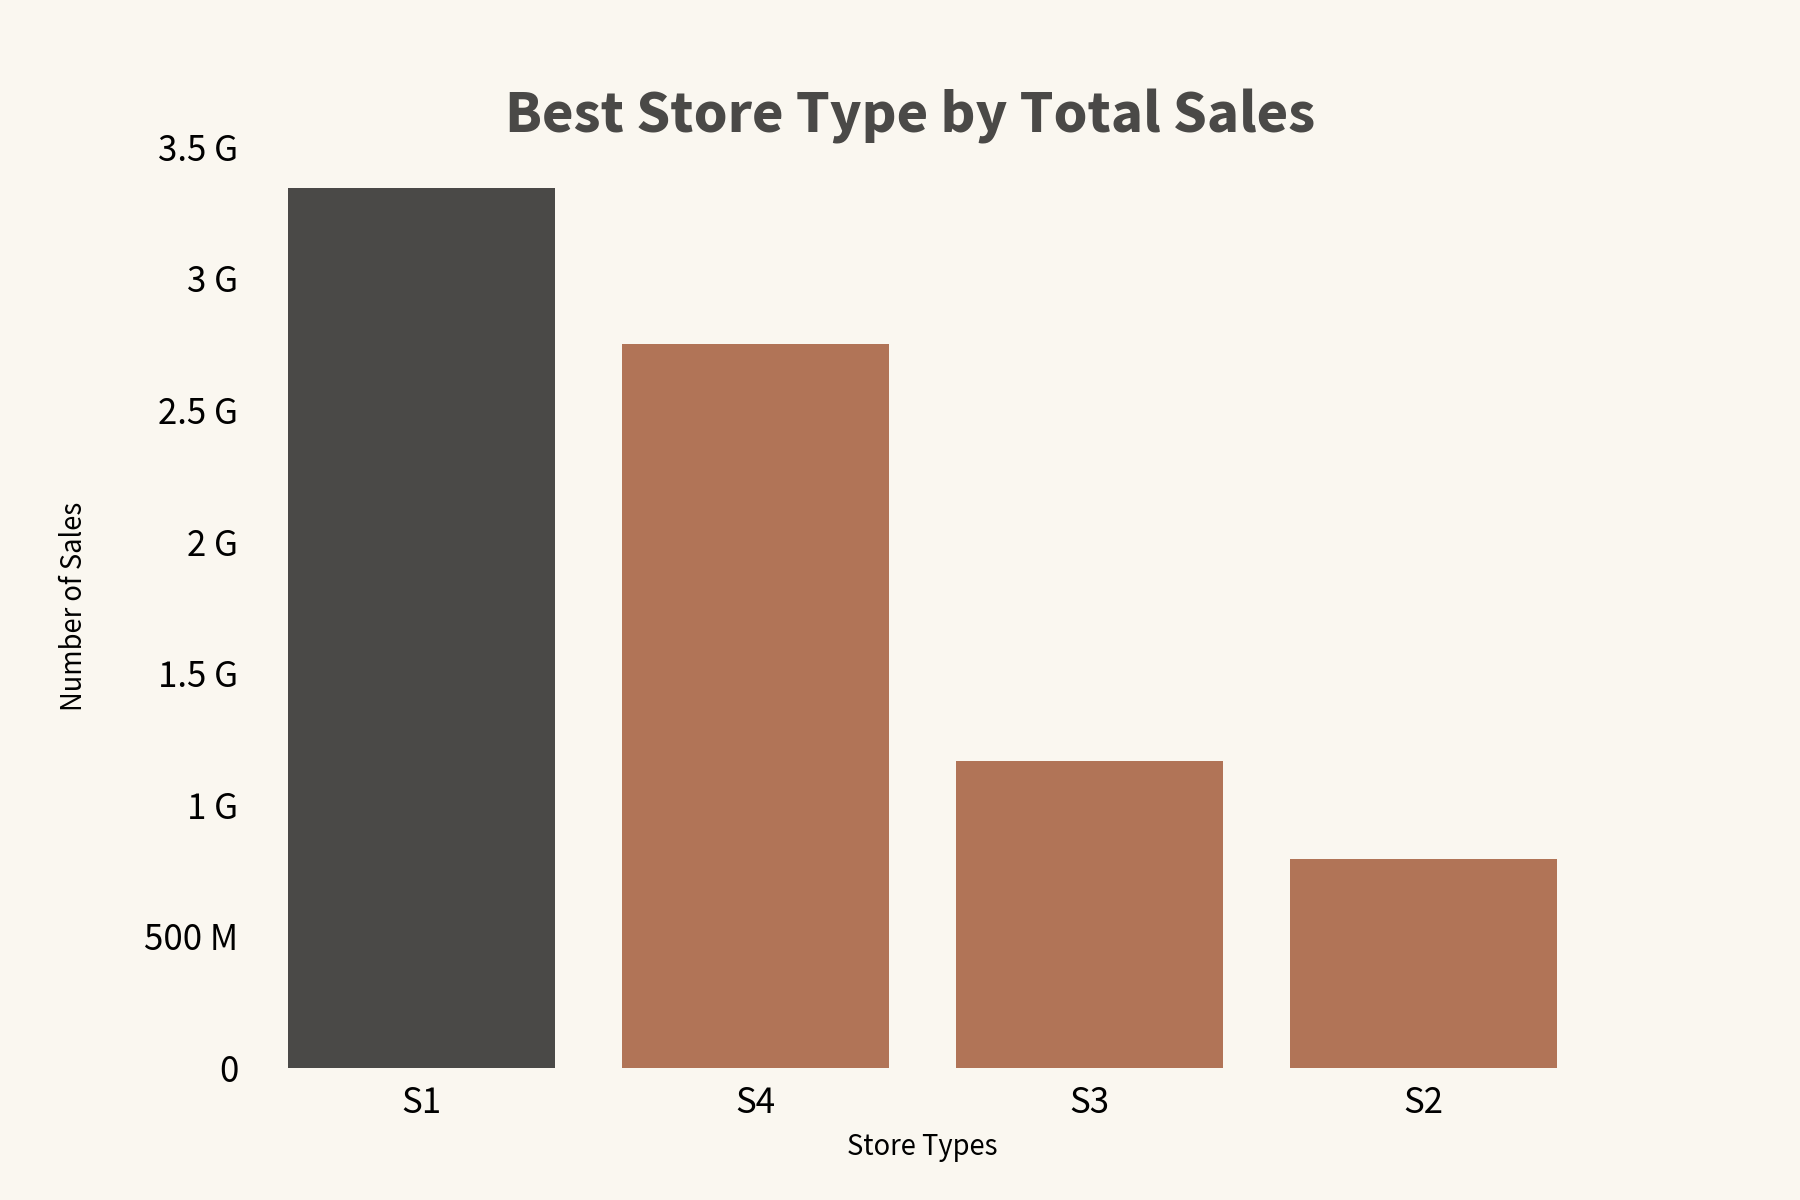

In [76]:
# Which are the best store types (by number of sales)?
best_store_type = train.groupby(['Store_Type'],as_index=False)['Sales'].sum() #Sum sales from same store type
best_store_type = best_store_type.sort_values('Sales',ascending=False) #Sort the values
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

#Visulisation
fig,ax = plt.subplots(figsize=(9,6))
fig.patch.set_facecolor('#FAF7F0')
ax.patch.set_facecolor('#FAF7F0')

#For Changing Colors
col1 = best_store_type.head(1)
col2 = best_store_type.tail(3)

ax.bar(col1.Store_Type, col1.Sales, color='#4A4947')
ax.bar(col2.Store_Type, col2.Sales, color='#B17457')

#Remove Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Store Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.25, 3555000000, "Best Store Type by Total Sales", size=22, color="#4A4947", fontweight="bold")
plt.show()

As per the above chart we can clearly see that **Store Type S1** is the best in terms of Sales

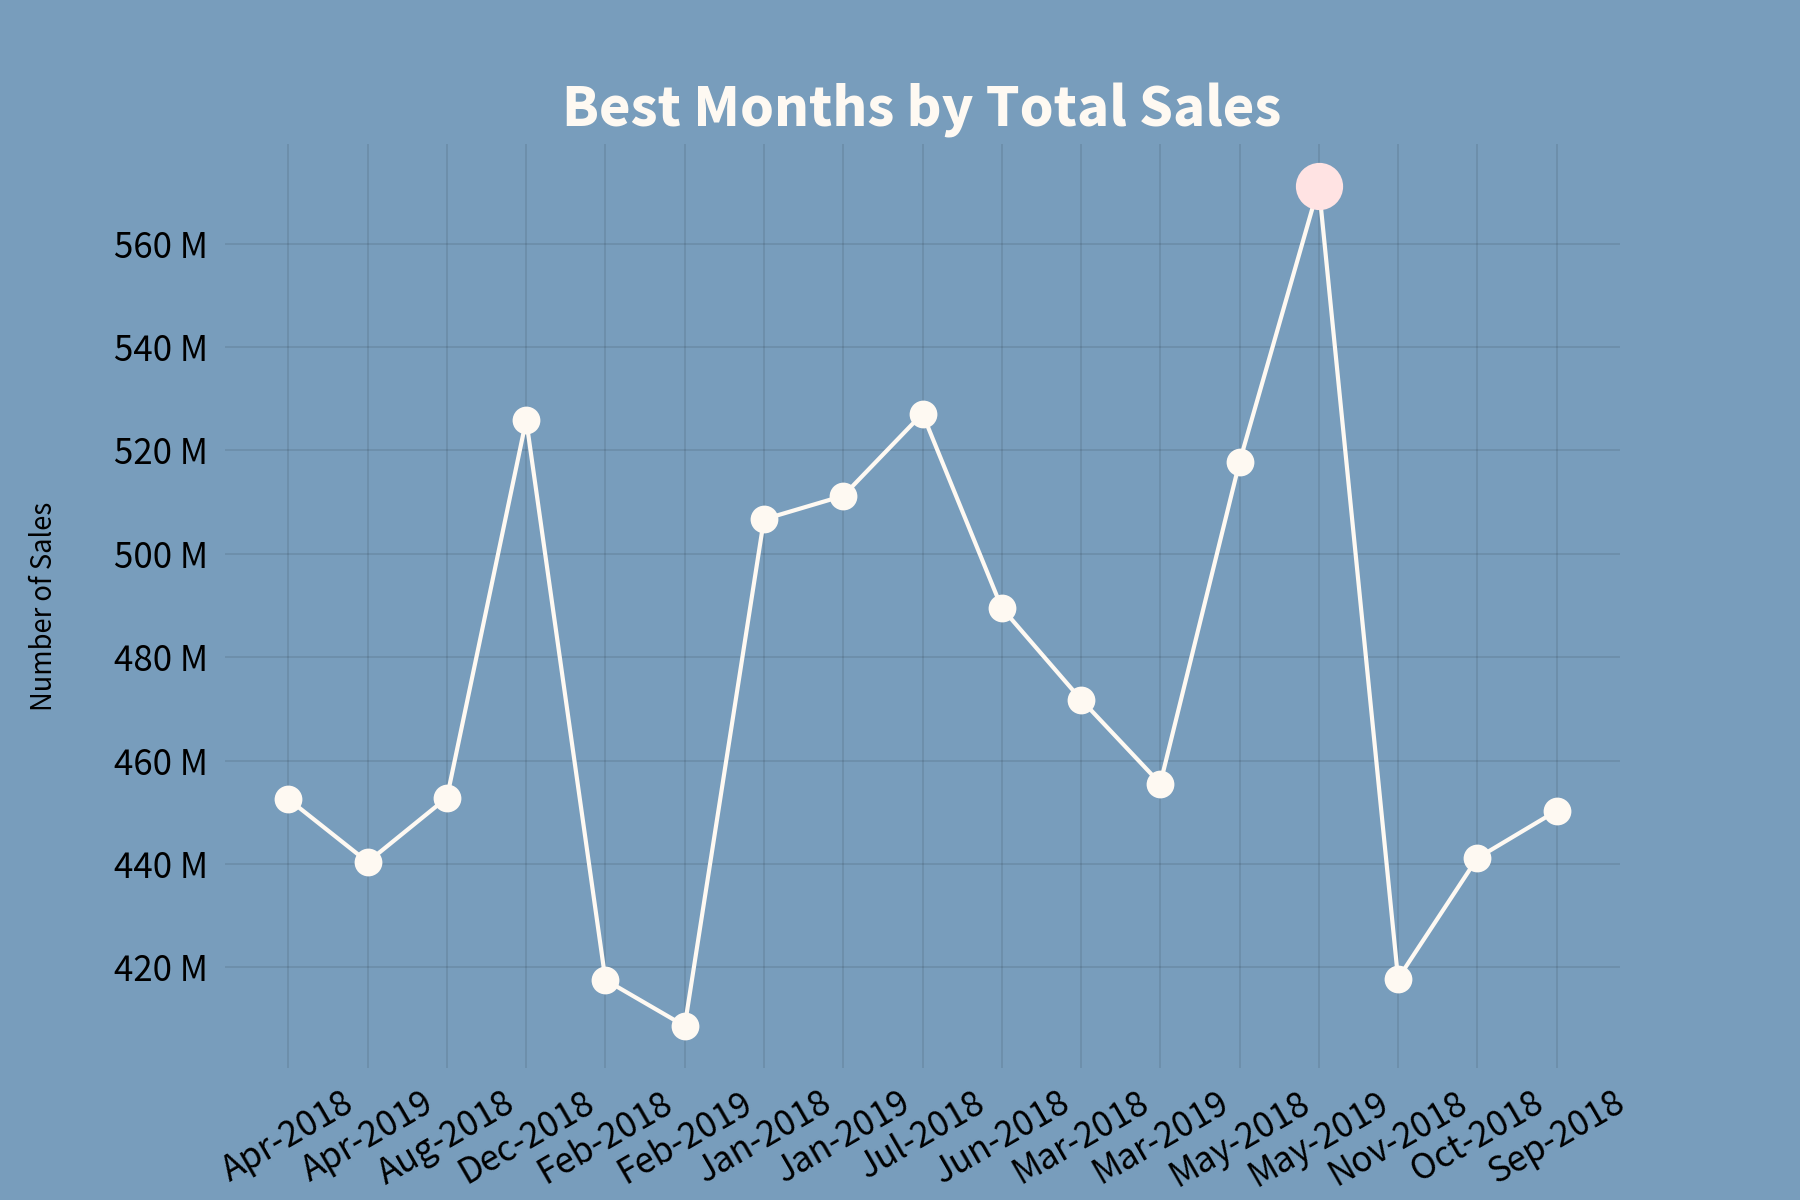

In [77]:
# Data preparation
best_month = train.copy()  # Assuming `train` is your original DataFrame
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y'))
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()

# Visualization setup
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('#789DBC')
ax.patch.set_facecolor('#789DBC')

# Find the best month
best_month_sorted = best_month.sort_values('Sales', ascending=False)
best_month_highlight = best_month_sorted.iloc[0]

# Extract data for plotting
months = best_month['Month'].tolist()
sales = best_month['Sales'].tolist()
best_month_name = best_month_highlight['Month']
best_month_sales = best_month_highlight['Sales']

# Plot all months
ax.plot(months, sales, marker='o', markerfacecolor='#FEF9F2', color='#FEF9F2', markersize=9)

# Highlight the best month
ax.plot(best_month_name, best_month_sales, marker='o', markerfacecolor='#FFE3E3', color='#FFE3E3', markersize=16)

# Rotate x-axis labels
plt.xticks(rotation=30)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

# Format y-axis with thousands (k)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Set font family
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Add labels and title
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)
plt.text(3.45, max(sales) * 1.02, "Best Months by Total Sales", size=22, color="#FEF9F2", fontweight="bold")

# Show plot
plt.show()

The best Month in terms of Sales as per the chart we can tell it is **May 2019**.

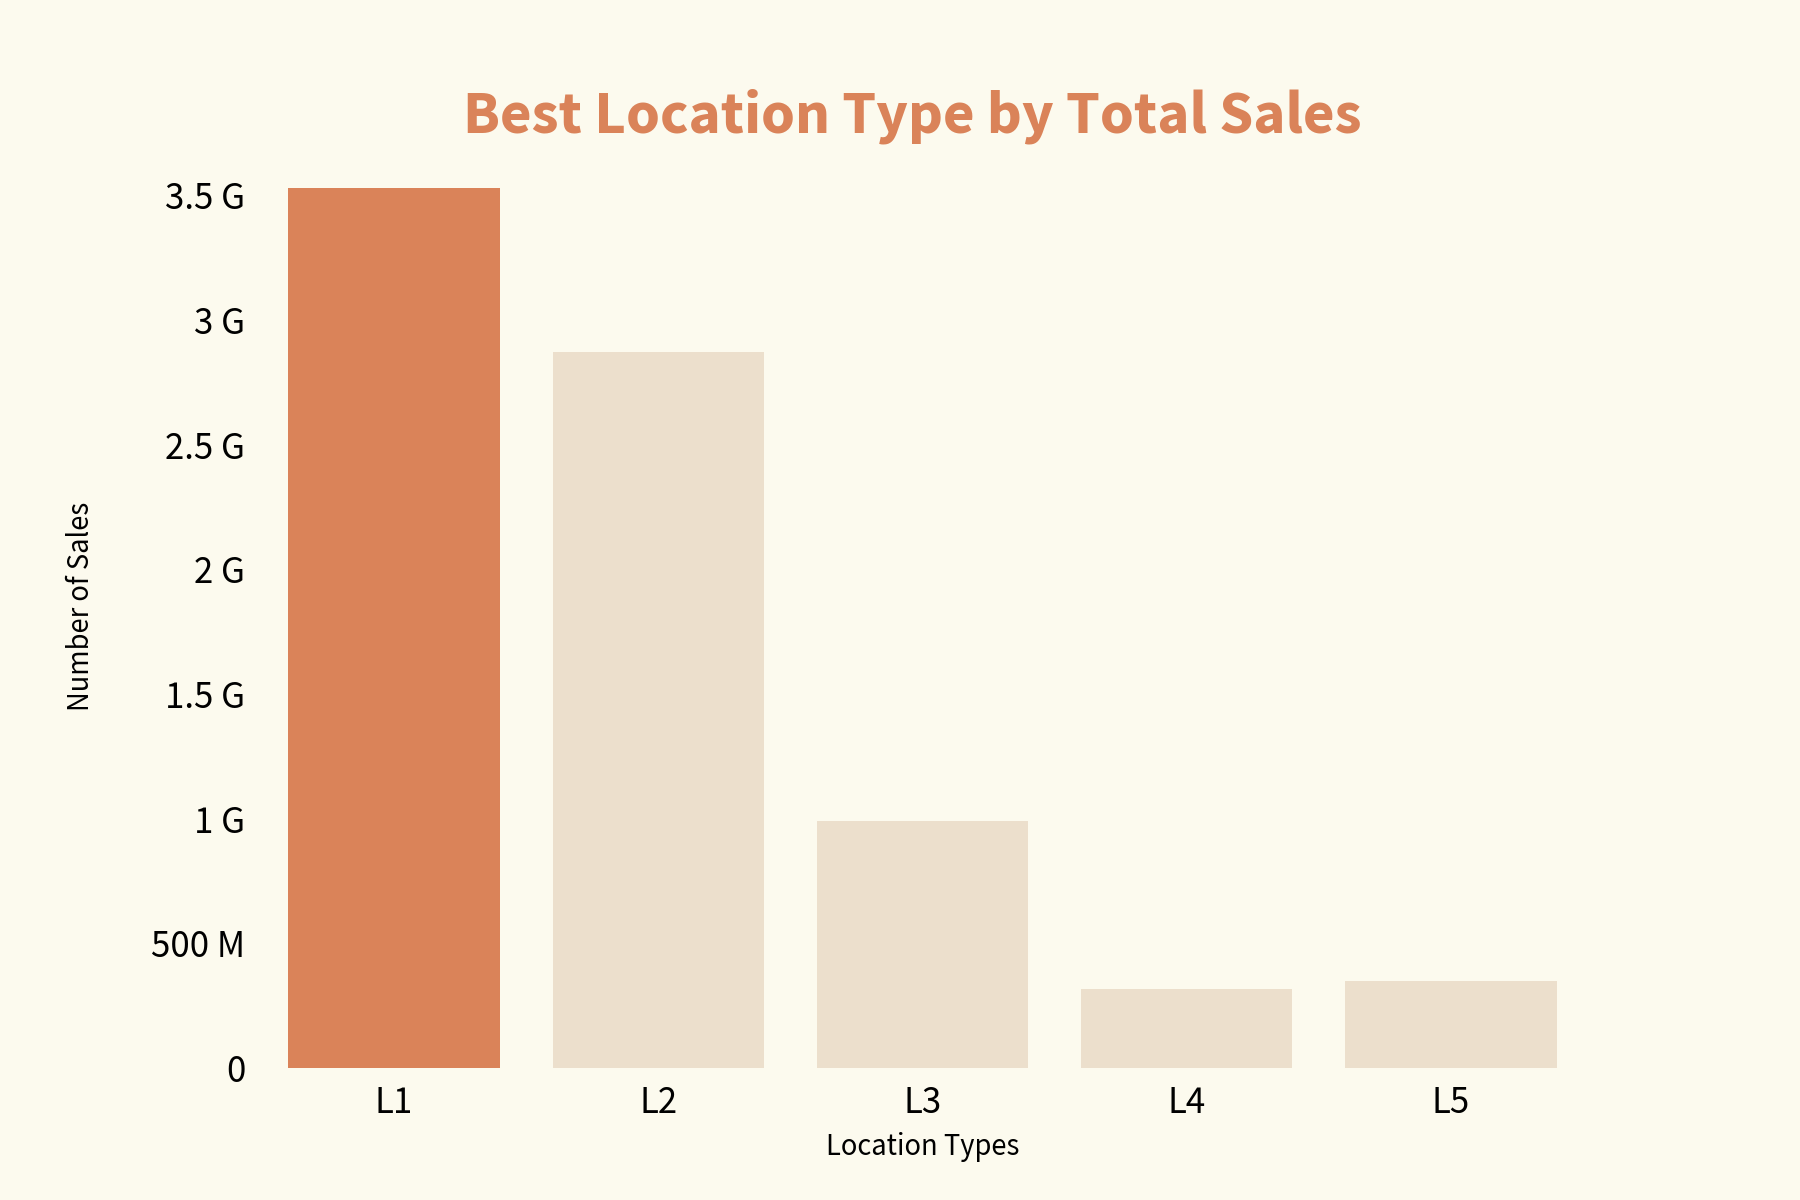

In [78]:
# Which are the best locations (by number of sales)?
best_location = train.groupby(['Location_Type'], as_index=False)['Sales'].sum()
best_location['Location_Type'] = best_location['Location_Type'].astype(str)

#Visulaisation
fig,ax=plt.subplots(figsize=(9,6))
fig.patch.set_facecolor('#FCFAEE')
ax.patch.set_facecolor('#FCFAEE')

#For changing color
col1 = best_location.head(1)
col2 = best_location.tail(4)

ax.bar(col1.Location_Type, col1.Sales, color="#DA8359")
ax.bar(col2.Location_Type, col2.Sales, color="#ECDFCC")

#Remove Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Remove Splines
for i in ['top','bottom','left','right'] :
  ax.spines[i].set_visible(False)

#Remove grids
plt.grid(b=None)

#Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Location Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.26, 3750000000, "Best Location Type by Total Sales", size=22, color="#DA8359", fontweight="bold")
plt.show()

From the above chart Location Type **L1** is the best in terms of Sales.

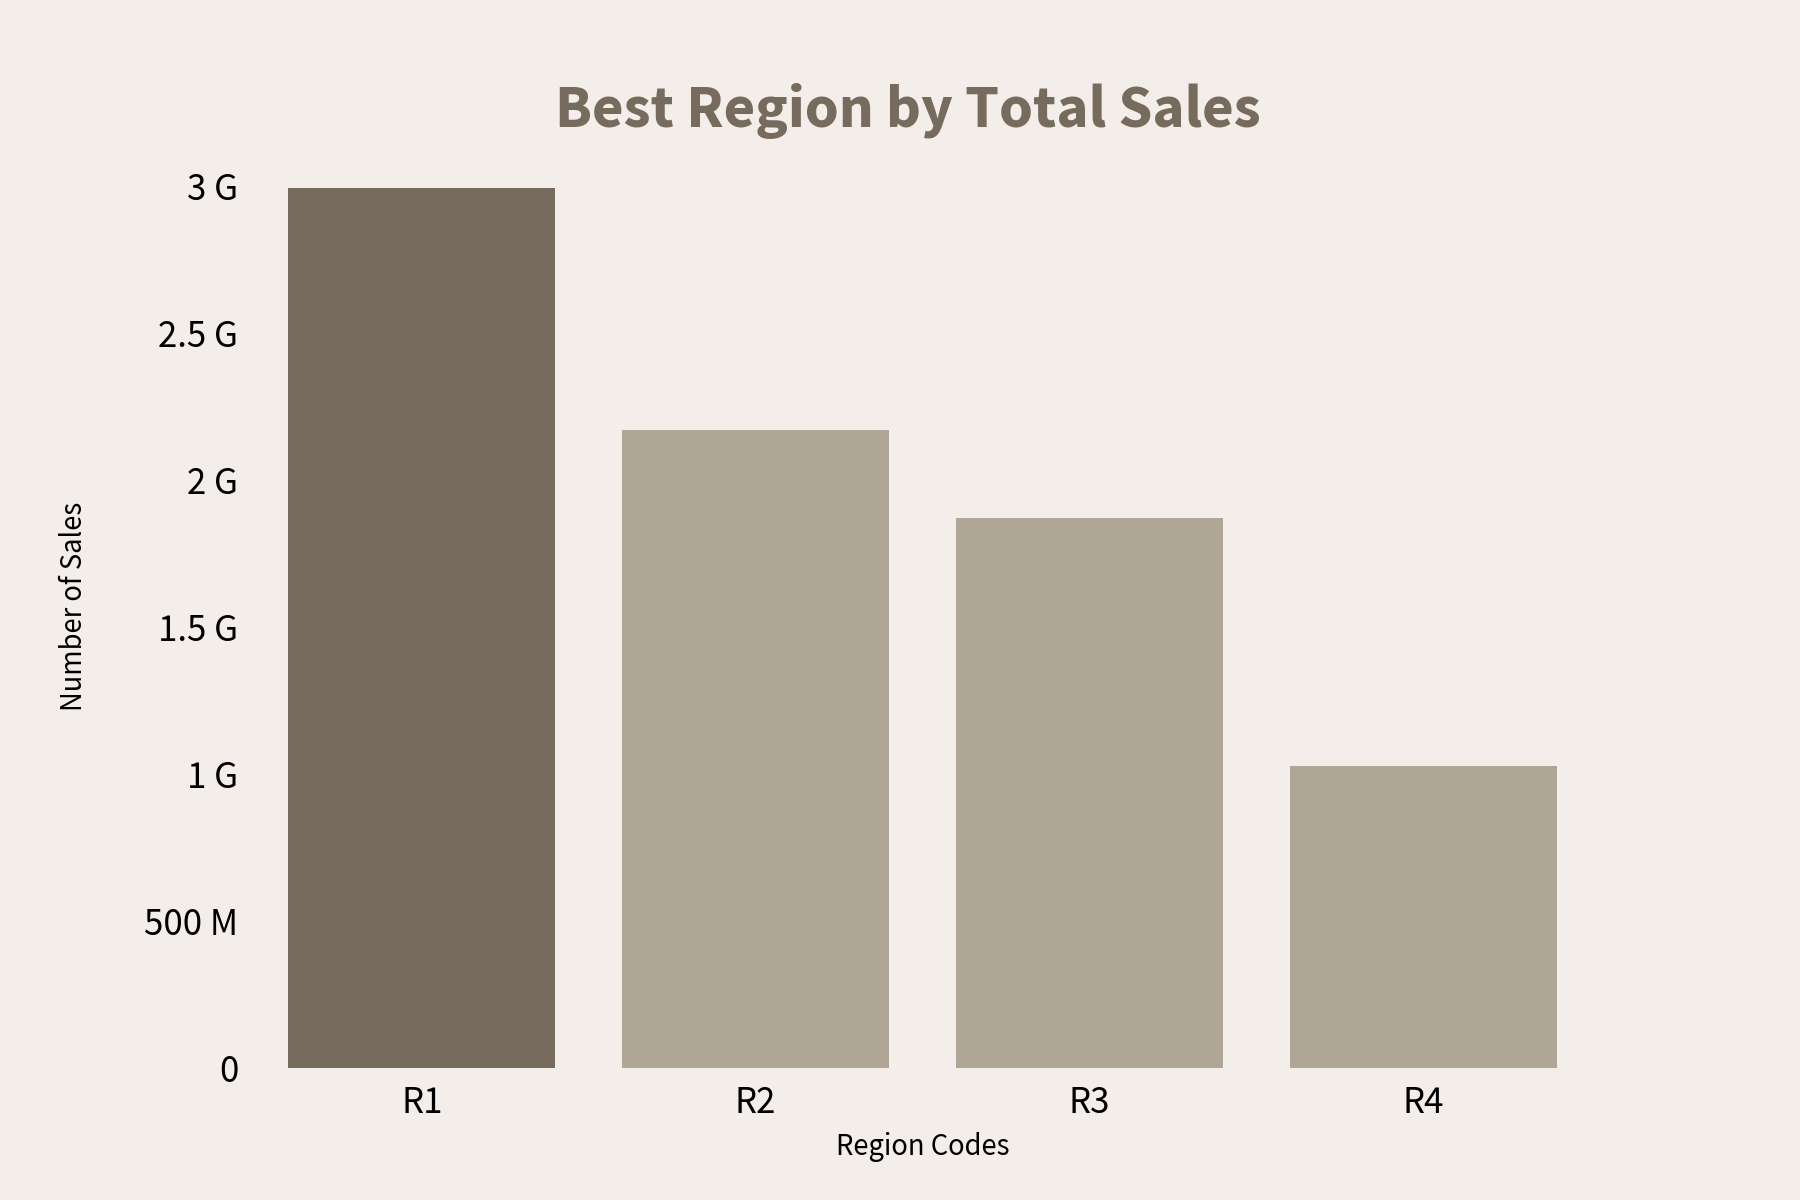

In [79]:
# Which are the best regions (by number of sales)?
best_region = train.groupby(['Region_Code'],as_index=False)['Sales'].sum()
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

#Visualisation
fig,ax = plt.subplots(figsize=(9,6))
fig.patch.set_facecolor('#F3EEEA')
ax.patch.set_facecolor('#F3EEEA')

#For changing colors
col1 = best_region.head(1)
col2 = best_region.tail(3)
ax.bar(col1.Region_Code, col1.Sales, color='#776B5D')
ax.bar(col2.Region_Code, col2.Sales, color='#B0A695')

#Remove Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Remove Spline
for i in ['top','bottom','left','right']:
  ax.spines[i].set_visible(False)

#Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Region Codes', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.4, 3200000000, "Best Region by Total Sales", size=22, color="#776B5D", fontweight="bold")
plt.show()

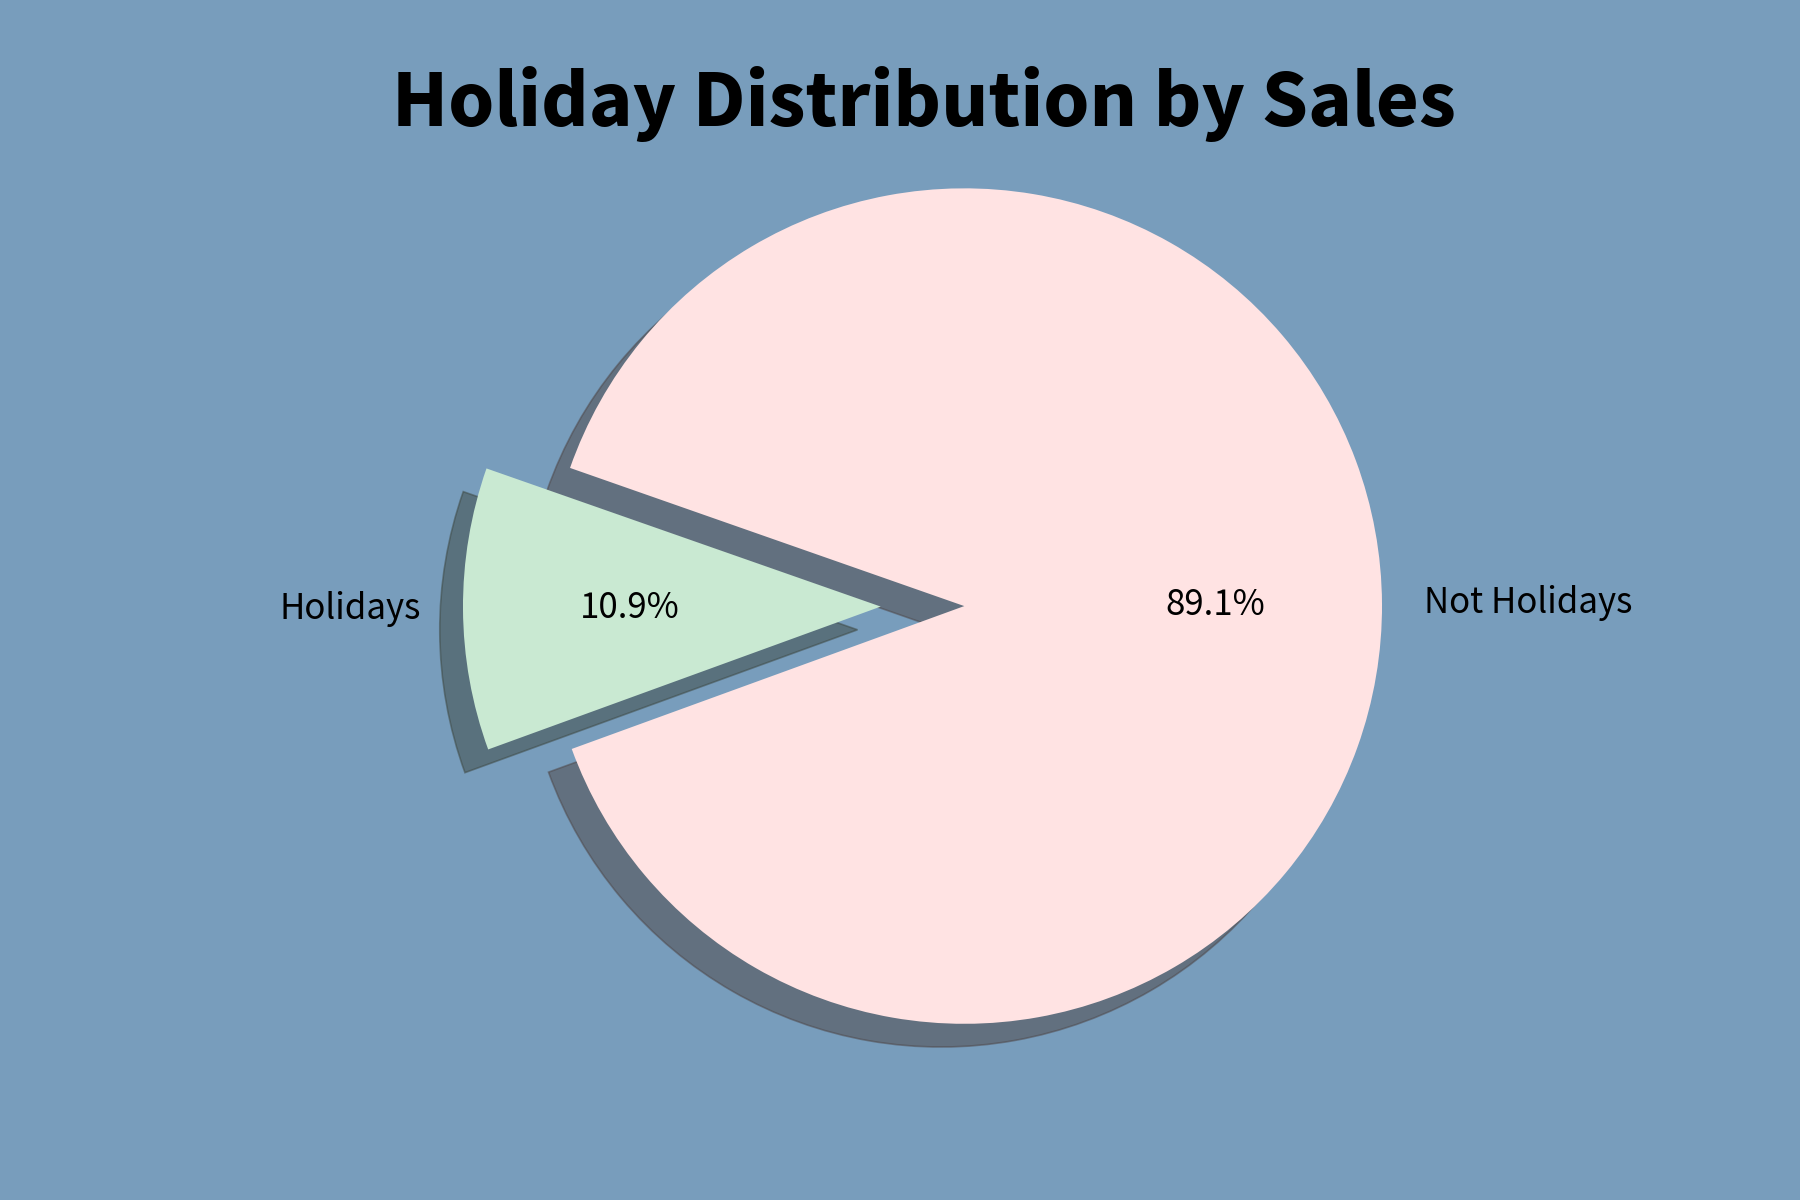

In [80]:
# Holidays Distribution
holiday = train.groupby(['Holiday'], as_index=False)['Sales'].sum()
holiday['Holiday'] = holiday['Holiday'].astype(str)

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#789DBC')

mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.pie(holiday['Sales'],
        explode=(0.2, 0),
        labels=['Not Holidays', 'Holidays'],
        colors= ['#FFE3E3', '#C9E9D2'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=200)

plt.axis('equal')

plt.text(-1.17, 1.15, "Holiday Distribution by Sales", size=30, color="#000000", fontweight="bold")
plt.show()

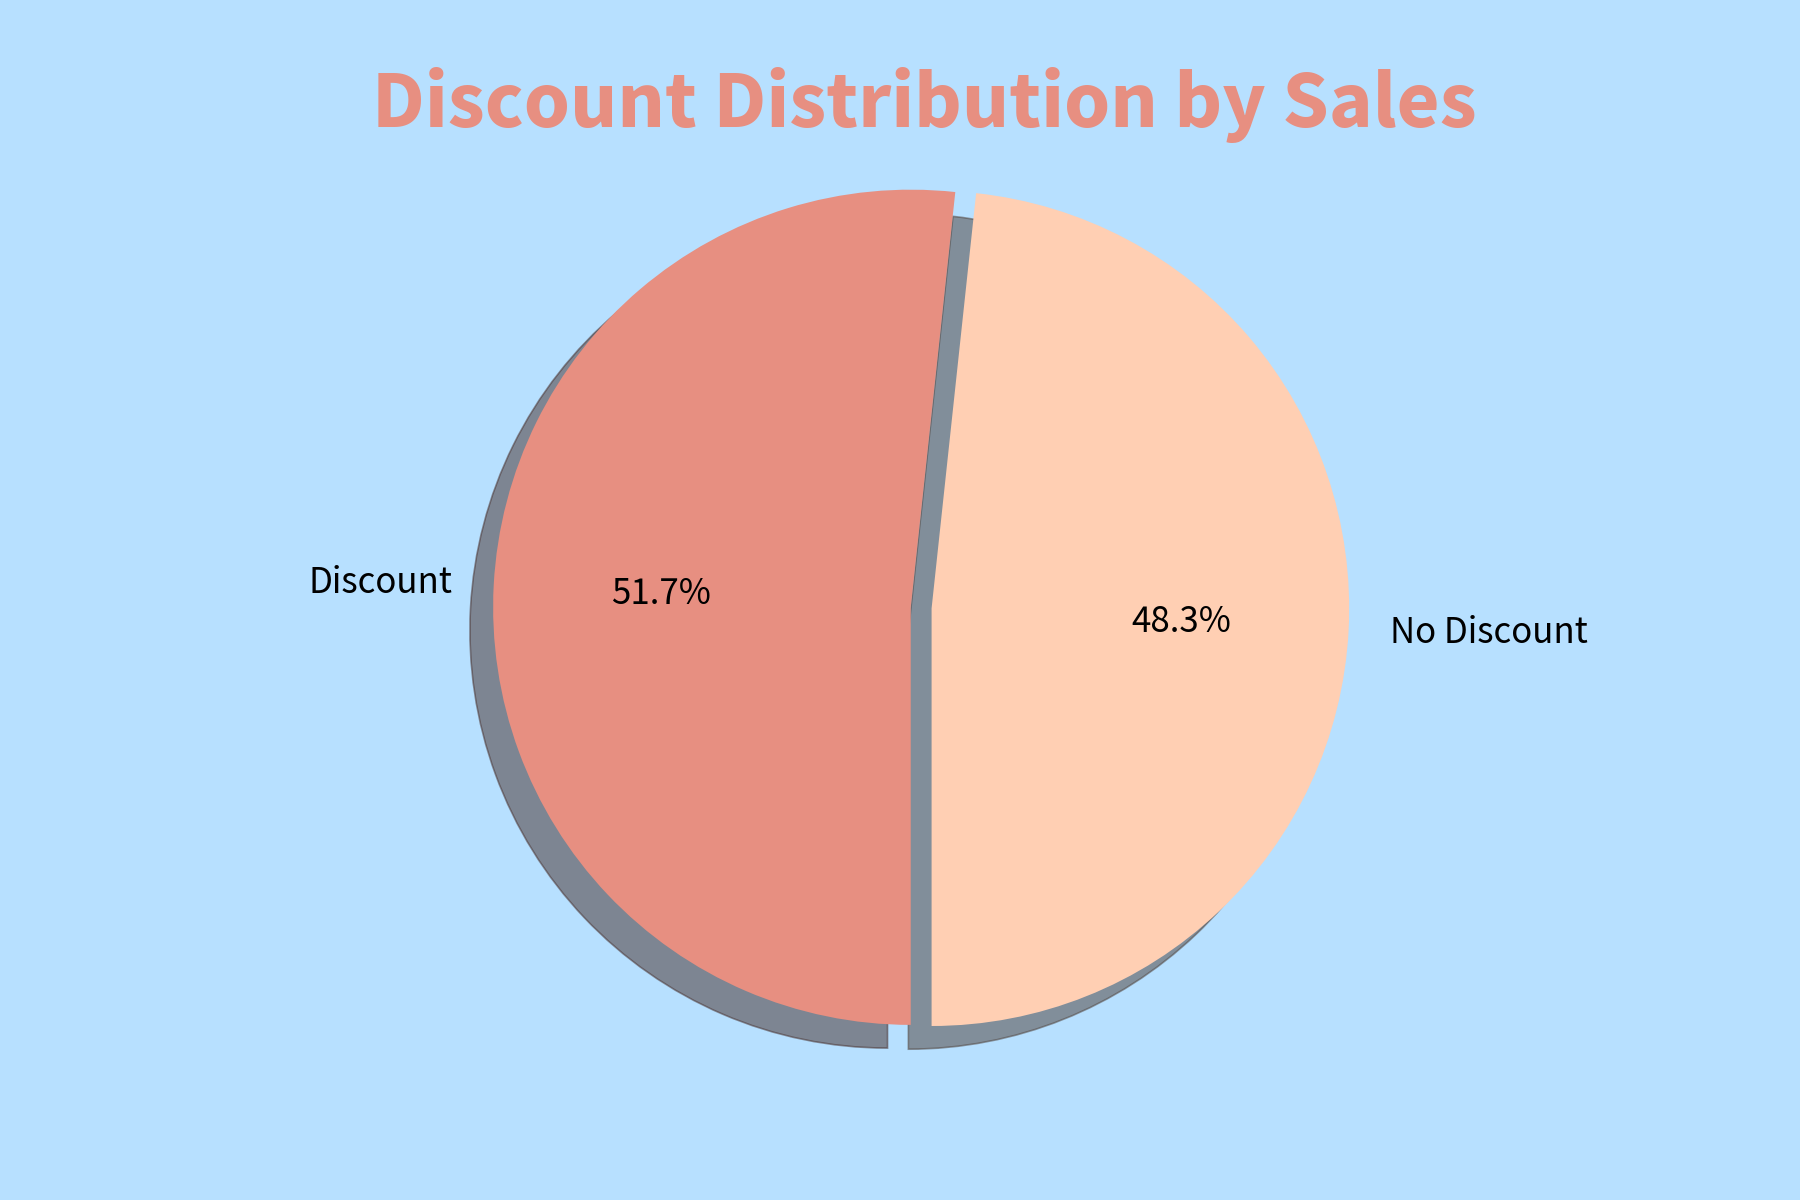

In [81]:
# Discount distribution
discount = train.groupby(['Discount'], as_index=False)['Sales'].sum()
discount['Discount'] = discount['Discount'].astype(str)
discount.head()

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#B7E0FF')

mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.pie(discount['Sales'],
        labels=['No Discount', 'Discount'],
        explode=(0.05, 0),
        colors= ['#FFCFB3', '#E78F81'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=270)

plt.axis('equal')

plt.text(-1.29, 1.15, "Discount Distribution by Sales", size=30, color="#E78F81", fontweight="bold")
plt.show()

**5. Feature Engineering**

In [82]:
# Let's check the data again
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [83]:
#The "ID" column will be useless for our prediction, so I'll drop it.
train = train.drop(columns=['ID'])
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [84]:
#Changing data types for the model
print('Data type per variable:')
print(train.dtypes)

train[['Store_id','Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(int)
print('Data type per variable after changes:')
print(train.dtypes)

Data type per variable:
Store_id                 object
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                  object
Discount                 object
#Order                    int64
Sales                   float64
dtype: object
Data type per variable after changes:
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                  int64
#Order                    int64
Sales                   float64
dtype: object


**Categorical variables**

For the categorical variables, I'm going to transform them into dummies variables. This process is known as **"One-Hot Encoding"**.

In [85]:
# Filter categorical variables
categ_cols = train.dtypes[train.dtypes == 'object']  # Identify categorical variables
categ_cols = categ_cols.index.tolist()              # Convert to list

# Perform one-hot encoding with pd.get_dummies()
train = pd.get_dummies(train, columns=categ_cols, drop_first=True)

# Ensure all encoded columns are of integer type (1 and 0)
train = train.astype({col: 'int32' for col in train.select_dtypes(include='bool').columns})

# Check the updated DataFrame
print(train.head())


   Store_id       Date  Holiday  Discount  #Order     Sales  Store_Type_S2  \
0         1 2018-01-01        1         1       9   7011.84              0   
1       253 2018-01-01        1         1      60  51789.12              0   
2       252 2018-01-01        1         1      42  36868.20              0   
3       251 2018-01-01        1         1      23  19715.16              1   
4       250 2018-01-01        1         1      62  45614.52              1   

   Store_Type_S3  Store_Type_S4  Location_Type_L2  Location_Type_L3  \
0              0              0                 0                 1   
1              0              1                 1                 0   
2              1              0                 1                 0   
3              0              0                 0                 1   
4              0              0                 0                 1   

   Location_Type_L4  Location_Type_L5  Region_Code_R2  Region_Code_R3  \
0                 0            

In [86]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day_of_week'] = train['Date'].dt.dayofweek
train['Weekday'] = train['Date'].dt.weekday
train['Quarter'] = train['Date'].dt.quarter

train = pd.get_dummies(train, columns=['Year', 'Month', 'Day_of_week', 'Weekday', 'Quarter'],
                      drop_first=True, prefix=['Year', 'Month', 'Day_of_week', 'Weekday', 'Quarter'],
                      dtype=int)

train.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,...,Day_of_week_6,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Quarter_2,Quarter_3,Quarter_4
0,1,2018-01-01,1,1,9,7011.84,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,253,2018-01-01,1,1,60,51789.12,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,252,2018-01-01,1,1,42,36868.20,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,251,2018-01-01,1,1,23,19715.16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,250,2018-01-01,1,1,62,45614.52,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


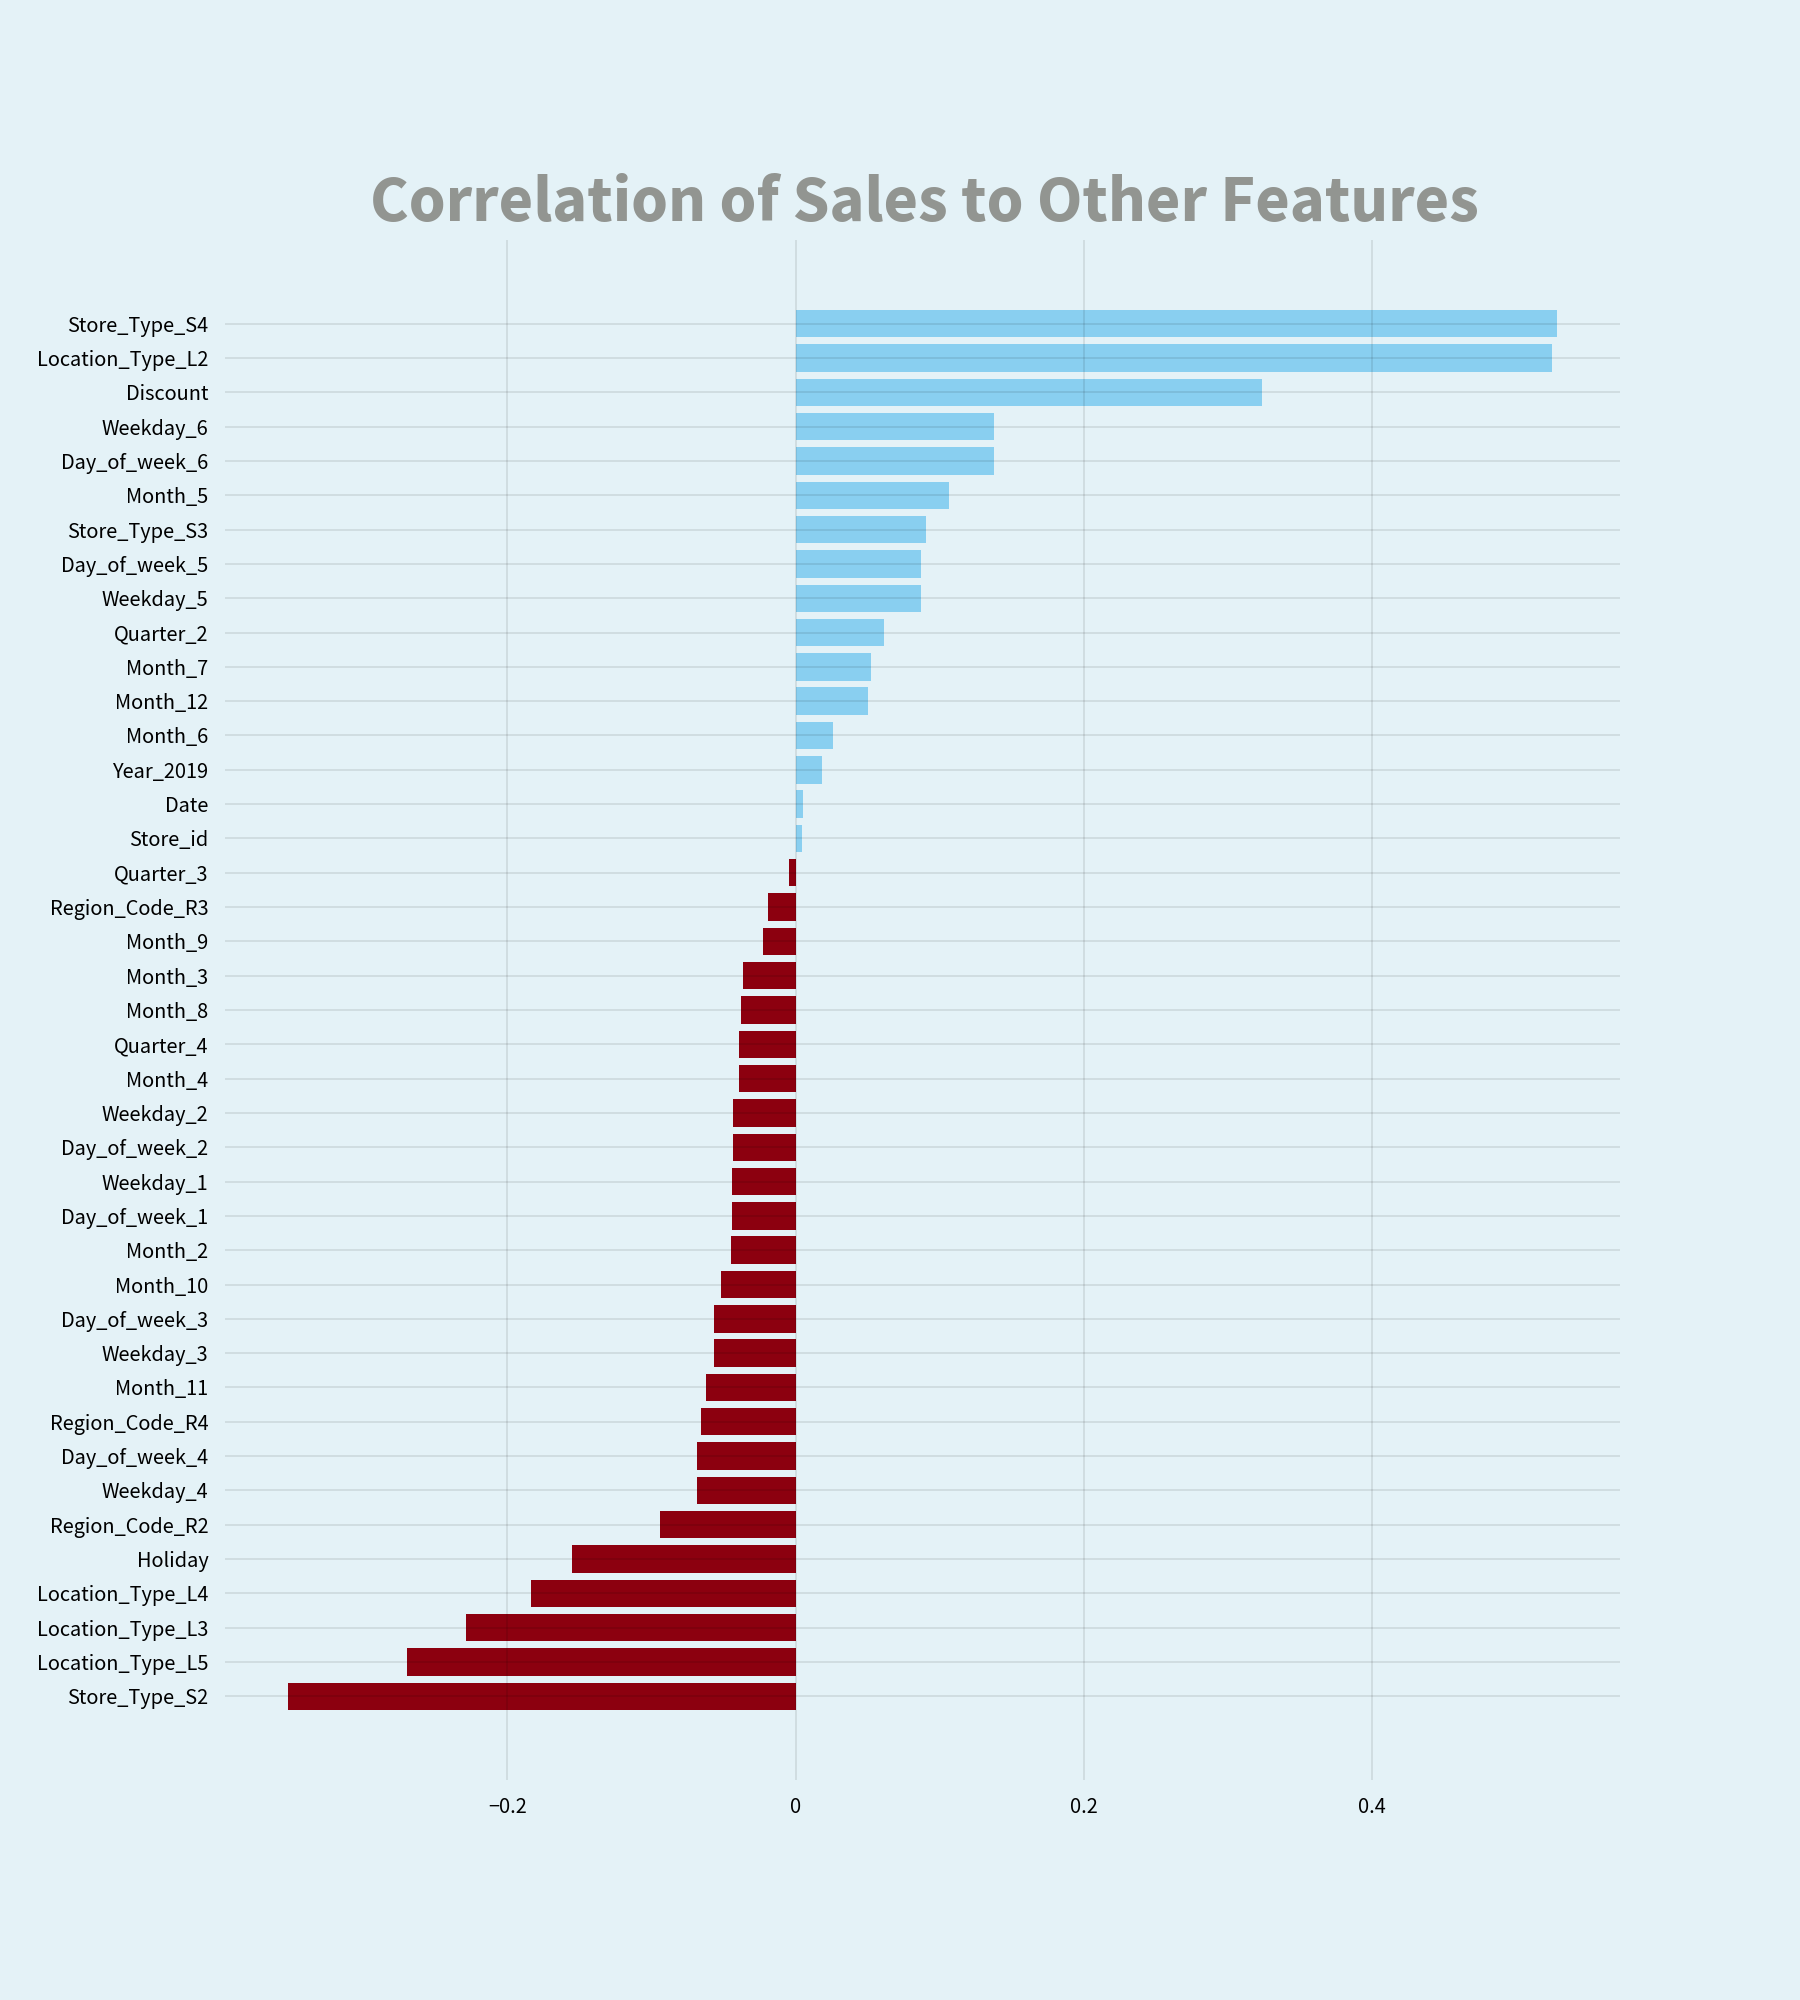

In [87]:
corr = train[train.columns].corr()['Sales'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.Sales > 0.90].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 10))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

ax.barh(corr.index, corr.Sales, align='center', color = np.where(corr['Sales'] < 0, 'crimson', '#89CFF0'))

ax.tick_params(axis='both', which='major', labelsize=8)
ax.yaxis.set_label_coords(0, 0)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.text(-0.295, 43, "Correlation of Sales to Other Features", size=24, color="grey", fontweight="bold");

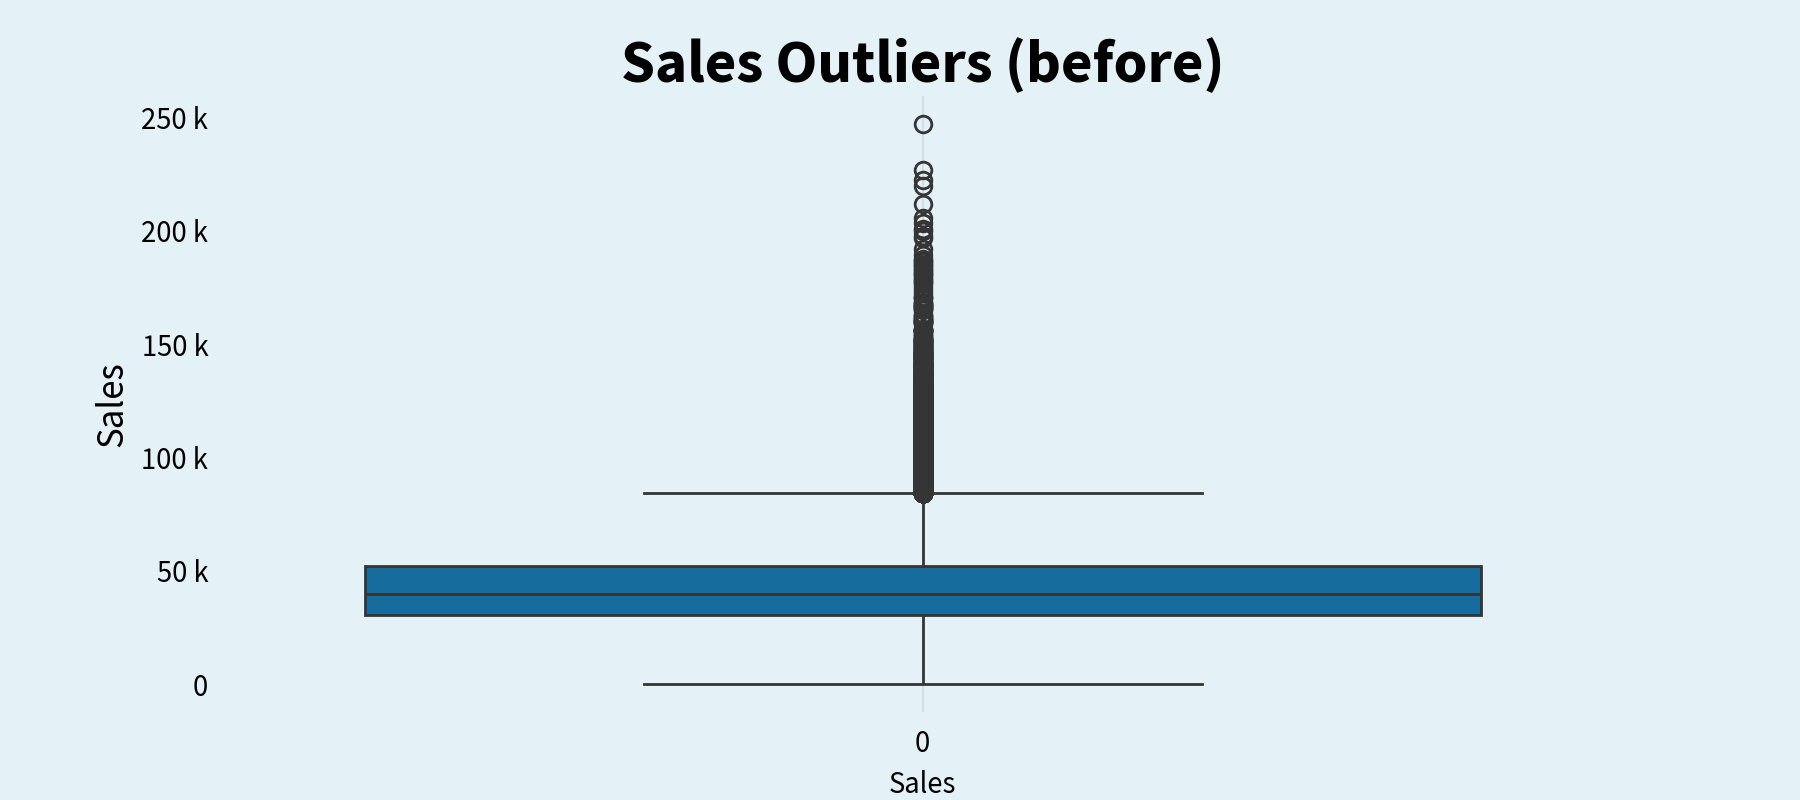

In [88]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train.Sales);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (before)', size=22, fontweight="bold");

In [89]:
# Dealing with the outliers
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sales'])
for i in train['Sales']:
    if i > Upper_tail or i < Lower_tail:
            train['Sales'] = train['Sales'].replace(i, med)

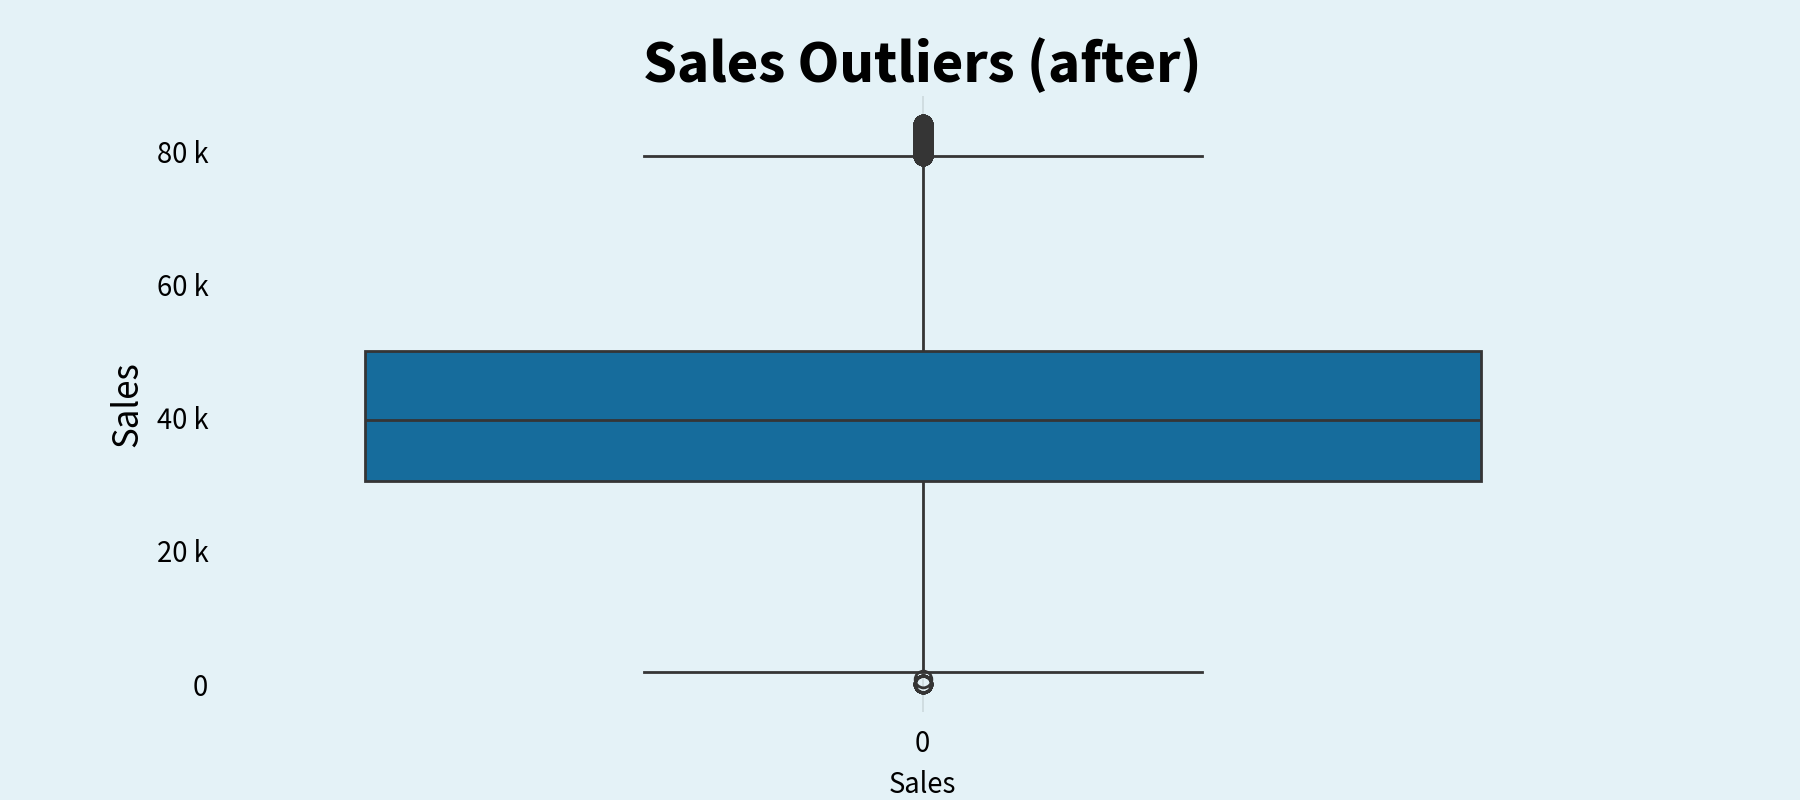

In [90]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train['Sales']);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (after)', size=22, fontweight="bold");

**Scaling target variable**

In my case, I'll scale my target variable to perform better in the predictive model.

"A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable."

In [91]:
# Normalization on Sales
train['Sales'] = MinMaxScaler().fit_transform(np.array(train['Sales']).reshape(-1,1))

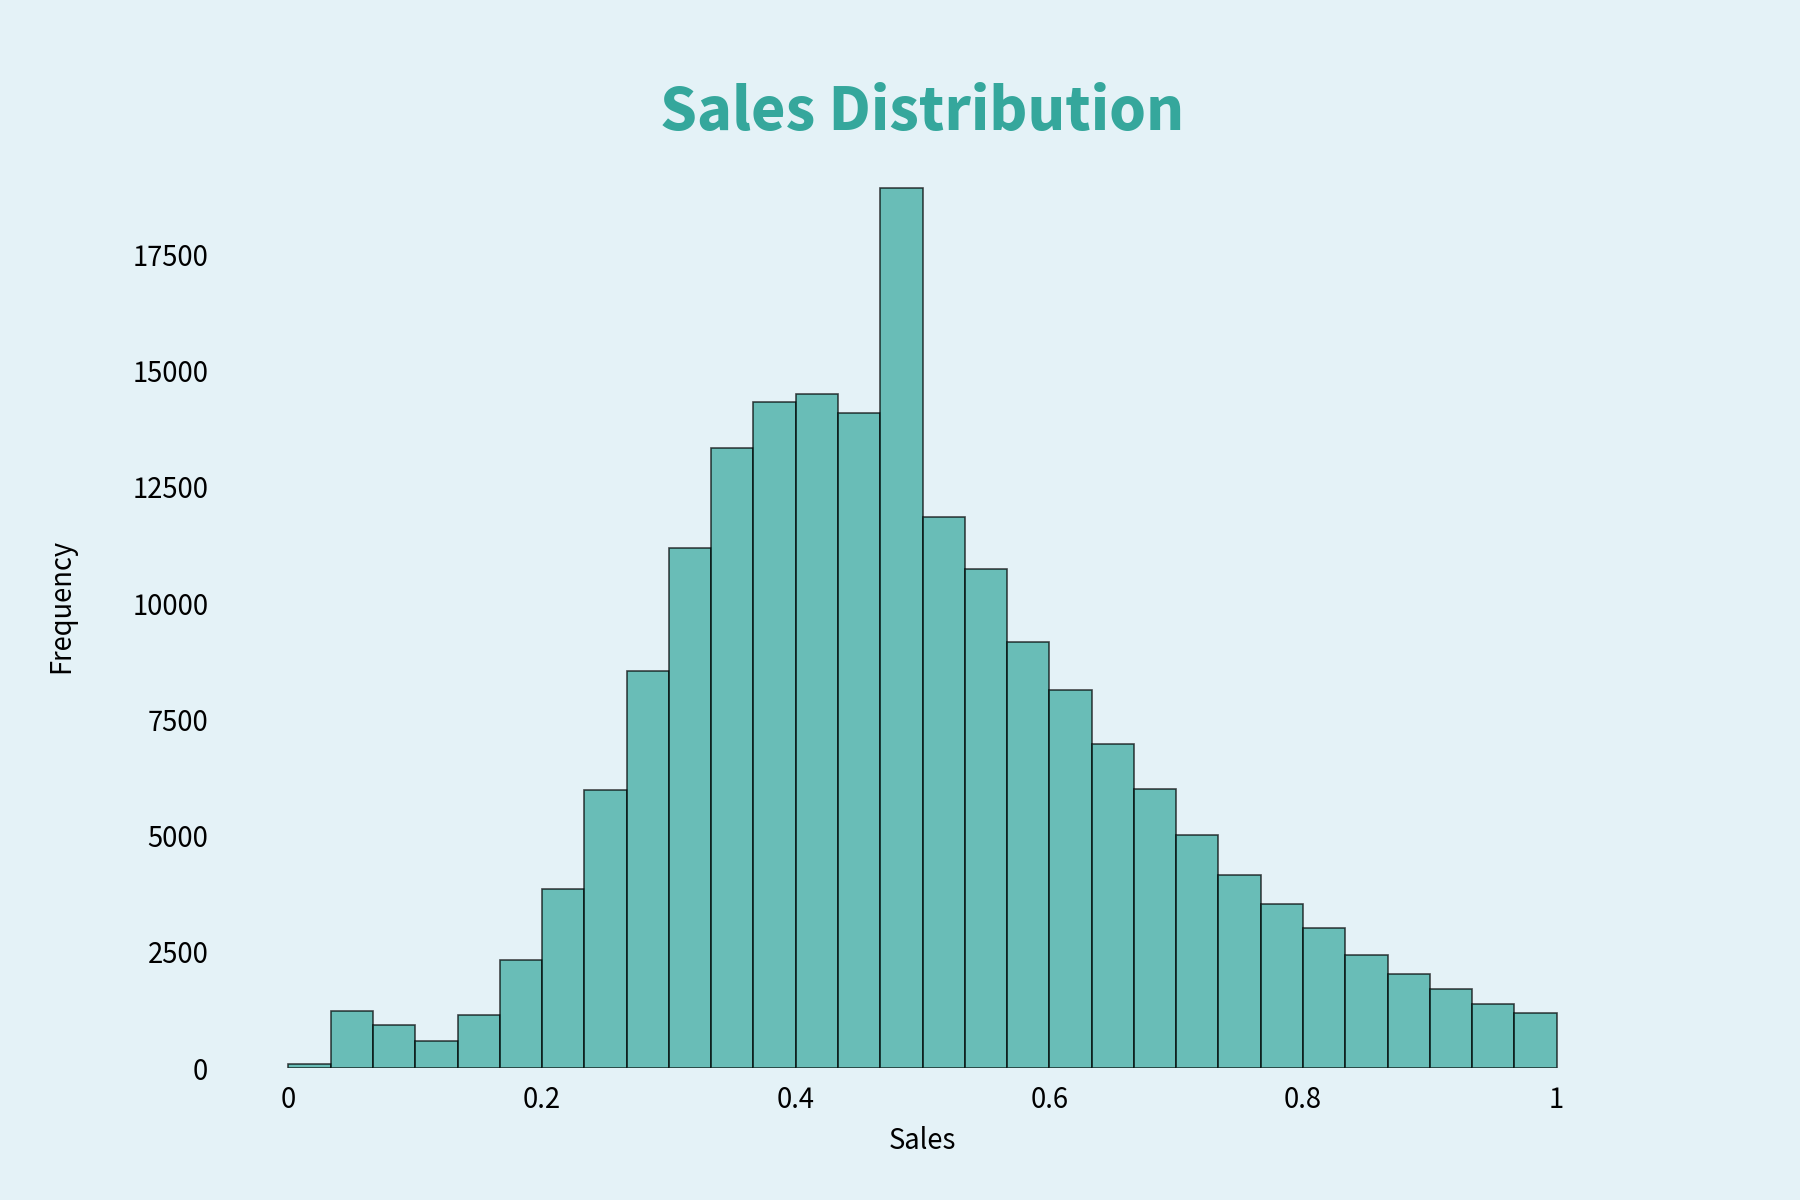

In [92]:
# Visualization using Matplotlib
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# Plot histogram
ax.hist(train['Sales'], bins=30, color="#35a79c", edgecolor='black', alpha=0.7)

# Customizations
ax.tick_params(axis='both', which='major', labelsize=11)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

plt.grid(False)
plt.xlabel('Sales', fontsize=11)
plt.ylabel('Frequency', fontsize=11, labelpad=20)

plt.title("Sales Distribution", size=24, color="#35a79c", fontweight="bold")
plt.show()

In [111]:
# Load data
train = pd.read_csv('/content/TRAIN.csv')
test = pd.read_csv('/content/TEST_FINAL.csv')

# === Step 1: Data Preprocessing ===
# Rename and map 'Discount' column
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})
test['Discount'] = test['Discount'].map({'Yes': 1, 'No': 0})

# Handle missing values in test data
# Fill NaN values
for col in ['Store_id', 'Holiday', 'Discount']:
    if test[col].isnull().any():
        test[col] = test[col].fillna(0 if col in ['Holiday', 'Discount'] else test[col].mode()[0])

# Convert necessary columns to integers
train[['Store_id', 'Discount', 'Holiday']] = train[['Store_id', 'Discount', 'Holiday']].astype(int)
test[['Store_id', 'Discount', 'Holiday']] = test[['Store_id', 'Discount', 'Holiday']].astype(int)

# Convert 'Date' to datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# === Step 2: Feature Engineering ===
# Add time-based features
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day_of_week'] = df['Date'].dt.dayofweek
    df['Quarter'] = df['Date'].dt.quarter

# Drop unused columns
train = train.drop(['ID', 'Date'], axis=1)
test = test.drop(['ID', 'Date'], axis=1)

# One-hot encode categorical columns
categorical_cols = ['Store_Type', 'Location_Type', 'Region_Code']
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

# Align columns in train and test
test = test.reindex(columns=train.columns.drop('Sales'), fill_value=0)

# Scale the target variable 'Sales'
scaler = MinMaxScaler()
train['Sales'] = scaler.fit_transform(train[['Sales']])

# === Step 3: Model Training ===
# Split the training data into training and validation sets
X = train.drop(['Sales'], axis=1)
y = train['Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Validate the model
val_predictions = model.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
print(f'Validation MSE: {mse}')

# === Step 4: Prediction on Test Data ===
# Predict sales for the test data
test_predictions = model.predict(test)

# Inverse transform the scaled predictions
predicted_sales = scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Prepare the results
predicted_sales_df = pd.DataFrame({
    'Store_id': test['Store_id'],
    'Predicted_Sales': predicted_sales.flatten()
})

# Display the results
print(predicted_sales_df.head())

Validation MSE: 0.00020755451383740157
   Store_id  Predicted_Sales
0       171      7225.191406
1       172      7427.629883
2       173      6729.580566
3       174      8213.179688
4       170      8030.090820
